# Computational Finance
## Series 9
Tientso Ning

In [3]:
import numpy as np
import pandas as pd
from scipy.stats import norm
import matplotlib.pyplot as plt

In [4]:
#Black Scholes Model
def black_scholes (S, K, r, t):
    '''
    Where S is the current stock price
    K is the strike prices
    r is the risk-free interest rate
    t is the time to maturity
    under a Normal distribution
    '''
    
    v = 0.2 #set volatility at 20% for our problem
    
    d1 = (np.log(S/K)+((r+(v**2)/2)*t))/(v*np.sqrt(t))
    d2 = d1-(v*np.sqrt(t))
    return S*norm.cdf(d1)-K*np.exp(-1*r*t)*norm.cdf(d2)

In [5]:
#set up the problem, asset S
C = black_scholes(100, 120, 0.05,1)
print("The value of this call at t=0 is: ", C)

The value of this call at t=0 is:  3.2474774165608125


In [6]:
#Binomial Pricing Model
def binomial_pricing (S, K, r, T, M):
    '''
    Where S is the current stock price
    K is the strike prices
    r is the risk-free interest rate
    t is the time to maturity
    M is the depth of the tree
    '''
    
    v = 0.2 #set volatility at 20% for our problem
    
    dt = T/M
    u = np.exp(v*np.sqrt(dt))
    d = 1/u
    p = (np.exp(r*dt)-d)/(u-d)
    C = {}
    for i in range(0, M+1):
        C[(M,i)] = max(S*(u**(2*i-M))-K,0)
    for j in range(M-1,-1,-1):
        for i in range(0, j+1):
            C[(j,i)] = np.exp(-r*dt)*(p*C[(j+1, i+1)]+(1-p)*C[(j+1,i)])
    return C[(0,0)]
    

In [7]:
prices = []
x = []
for d in range(0,100,5):
    
    if d == 0: #fix
        continue
    
    prices.append(binomial_pricing(100,120, 0.05, 1, d))
    x.append(d)
    
prices

[3.4397789010643804,
 3.327360766722486,
 3.246076237673185,
 3.142025304768589,
 3.2440089016040448,
 3.2765218213062623,
 3.233420280957389,
 3.220780046152497,
 3.2663380519483765,
 3.2421622728423847,
 3.2283708933600668,
 3.2619087425130218,
 3.2374498835420313,
 3.2415877173601975,
 3.258274618592409,
 3.227173662360304,
 3.2517103268321685,
 3.2518432788989786,
 3.2286960447089643]

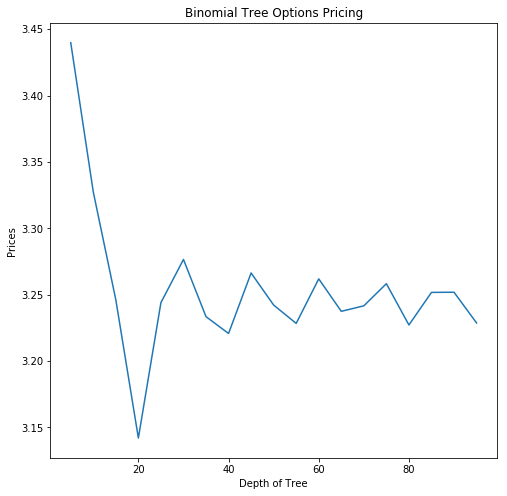

In [8]:
plt.figure(figsize=(8,8))
plt.plot(x,prices)
plt.xlabel("Depth of Tree")
plt.ylabel("Prices")
plt.title("Binomial Tree Options Pricing")
plt.show()

We can see that the prices start oscillating at around depth 25 onwards, meaning that for our case of obtaining a reasonable approximation, we would want a depth of around 30 or more (to start to see the value that it oscillates around).